## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Notes for self (To delete later):

### We are approaching this project from the perspective that we are a business who is deciding whether to have one singular large campus or to have multiple offices spread throughout the city for the effect that it would have on Seattle and the workers we are wanting to bring into the city.

--
# Our stakeholders are our Future Employees and ourselves as a business
--
## 

In [2]:
zipcode = [98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146, 98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133, 98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058, 98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008, 98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010, 98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177, 98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011, 98031, 98106, 98072, 98188, 98014, 98055, 98039]
pop_density = [4966, 6879, 3606, 6425, 2411, 662, 3800, 4441, 5573, 469, 5684, 7018, 9602, 6732, 141, 9905, 4423, 6279, 3591, 892, 4741, 8638, 6667, 2908, 469, 7953, 2215, 1717, 4323, 3580, 4604, 288, 3194, 10643, 1537, 4437, 1725, 13594, 7895, 3977, 2361, 4428, 2185,  7523, 334, 6841, 4714, 2024, 41, 15829, 785, 2989, 3794, 3341, 171, 2719, 3402, 10361, 52,3696, 4330, 236, 3569, 4877, 4161, 1231, 3062, 149, 4585, 2059] 
lists = list(zip(zipcode, pop_density)) 
pop_density_by_zip = pd.DataFrame(lists, columns = ['zipcode', 'pop_density']) 

df = pd.read_csv("data/king_county_data_clean.csv").drop('Unnamed: 0', axis=1)
df = pd.merge(left = df, right = pop_density_by_zip, on = 'zipcode', how='left')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,pop_density
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,4966
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,6879
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,3606
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,6425
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2411


In [3]:
options = [98155, 98177, 98133, 98155, 98125, 98117, 98103, 98115, 98105, 98102, 98112, 98109, 98107, 98119, 98199, 98122, 98144, 98134, 98108, 98118, 98168, 98106, 98126, 98136, 98116, 98146, 98178, 98121, 98101, 98154, 98104]  
seattle_proper = df[df['zipcode'].isin(options)] 
#seattle_proper

non_city_options = [98028, 98074, 98053, 98003, 98198, 98038, 98007, 98019, 98002, 98040, 98092, 98030, 98052, 98027, 98058, 98001, 98056, 98166, 98023, 98070, 98148, 98042, 98008, 98059, 98004, 98005, 98034, 98075, 98010, 98032, 98045, 98077, 98065, 98029, 98006, 98022, 98033, 98024, 98011, 98031, 98072, 98188, 98014, 98055, 98039]
burbs = df[df['zipcode'].isin(non_city_options)] 
#burbs

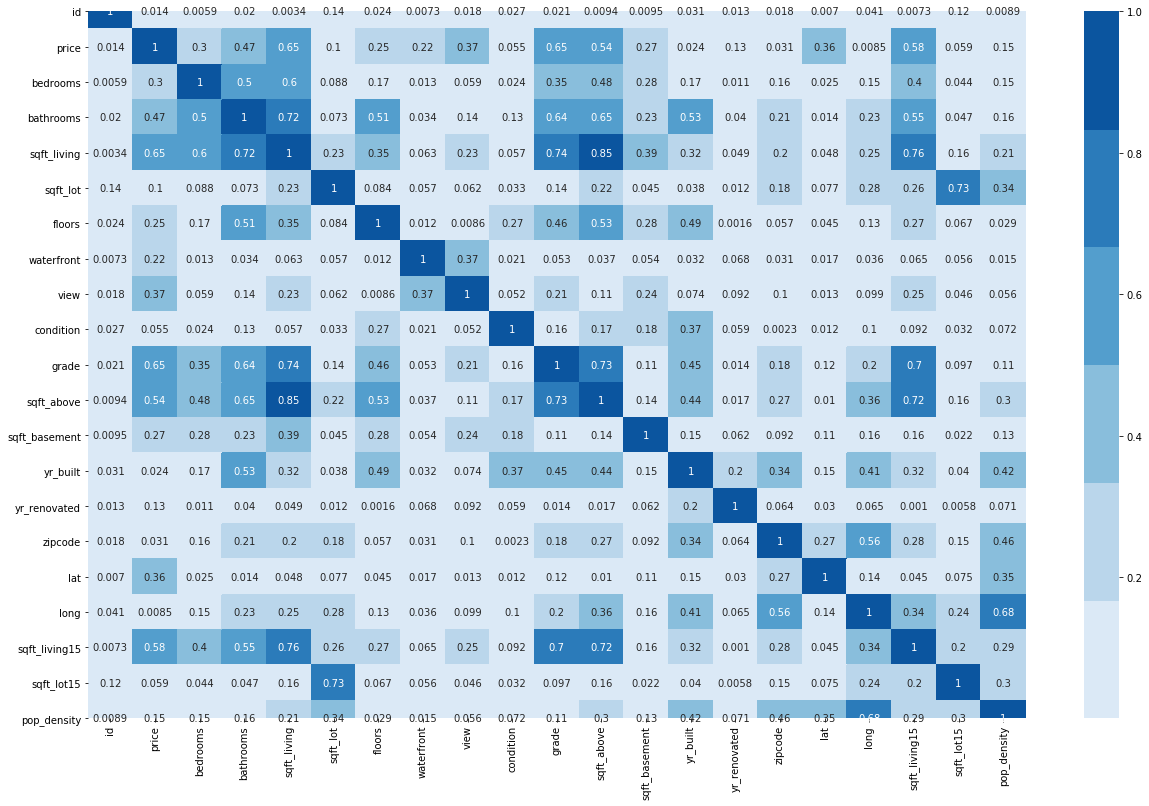

In [29]:
corr = np.abs(df.corr())
plt.figure(figsize=(21, 13))
sns.heatmap(data=corr, annot=True, cmap=sns.color_palette('Blues'), fmt = '0.2g')

Value is non numeric:  date <class 'str'>


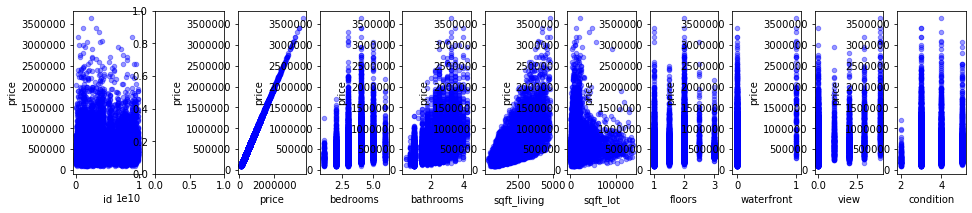

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=int(len(df.columns)/2), figsize=(16,3))

for xcol, ax in zip(list(df.columns)[:11], axes):
    try:
        df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')
    except:
        print('Value is non numeric: ', xcol, type(xcol))

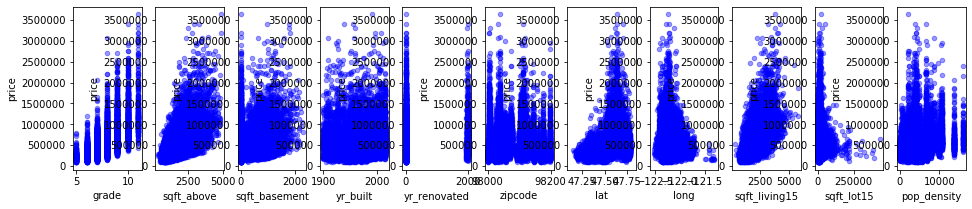

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=int(len(df.columns)/2), figsize=(16,3))

for xcol, ax in zip(list(df.columns)[11:], axes):
    try:
        df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')
    except:
        print('Value is non numeric: ', xcol, type(xcol))

In [6]:
# Plan to change these into dummies or binomial distributions later
categorical_columns = ['waterfront','view','sqft_basement','yr_renovated','zipcode']

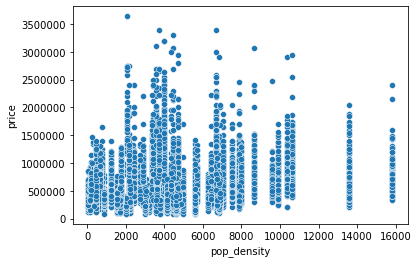

In [7]:
sns.scatterplot(data=df, x='pop_density', y='price')

In [8]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'pop_density'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20789 entries, 0 to 20788
Data columns (total 22 columns):
id               20789 non-null int64
date             20789 non-null object
price            20789 non-null float64
bedrooms         20789 non-null int64
bathrooms        20789 non-null float64
sqft_living      20789 non-null int64
sqft_lot         20789 non-null int64
floors           20789 non-null float64
waterfront       20789 non-null float64
view             20789 non-null float64
condition        20789 non-null int64
grade            20789 non-null int64
sqft_above       20789 non-null int64
sqft_basement    20789 non-null float64
yr_built         20789 non-null int64
yr_renovated     20789 non-null float64
zipcode          20789 non-null int64
lat              20789 non-null float64
long             20789 non-null float64
sqft_living15    20789 non-null int64
sqft_lot15       20789 non-null int64
pop_density      20789 non-null int64
dtypes: float64(9), int64(12), objec

In [10]:
amazon_coordinates = ( 47.623211, -122.337158)
microsoft_coordinates = (47.642440, -122.137030)
center = np.array(((amazon_coordinates[0]+microsoft_coordinates[0])/2 , (amazon_coordinates[1]+microsoft_coordinates[1])/2))
center

array([  47.6328255, -122.237094 ])

In [11]:
df['distance_frm_center'] = (df['lat']-center[0])**2 + (df['long']-center[1])**2

In [12]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,pop_density,distance_frm_center
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,4966,0.015189
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,6879,0.014483
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,3606,0.011057
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,6425,0.036856
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2411,0.037157


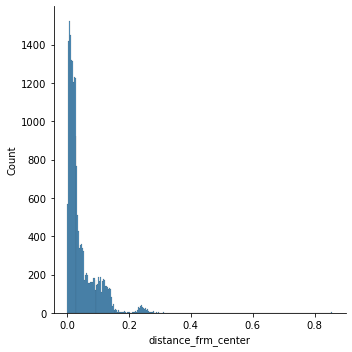

In [13]:
sns.displot(df['distance_frm_center'])

In [14]:
df['distance_frm_center'].describe()

count    20789.000000
mean         0.043920
std          0.051466
min          0.000001
25%          0.012823
50%          0.025370
75%          0.055071
max          0.856685
Name: distance_frm_center, dtype: float64

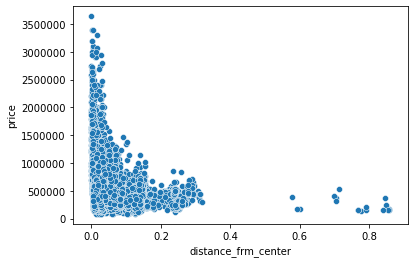

In [15]:
sns.scatterplot(x=df['distance_frm_center'], y=df['price'], data=df)

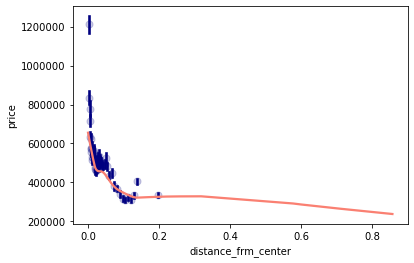

In [53]:
sns.regplot(x=df['distance_frm_center'], y=df['price'],x_bins=50,\
            data=df, lowess=True, line_kws = {'color':'salmon'}, scatter_kws={'color':'navy', 'alpha':0.2})

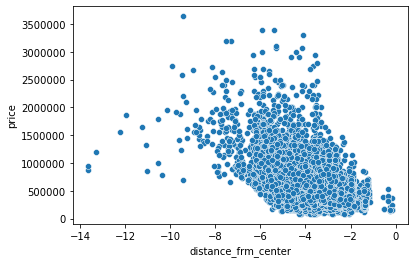

In [16]:
# we must log transform distance from center
sns.scatterplot(x = df['distance_frm_center'].map(lambda x: np.log(x)), y= df['price'], data=df)
df['log_dist_frm_center'] = df['distance_frm_center'].map(lambda x: np.log(x))

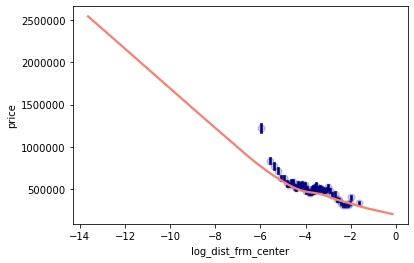

In [13]:
sns.regplot(x=df['log_dist_frm_center'], y=df['price'],x_bins=50,\
            data=df, lowess=True, line_kws = {'color':'salmon'}, scatter_kws={'color':'navy', 'alpha':0.2})

In [17]:
np.corrcoef(x= df['log_dist_frm_center'], y= df['price'])[0][1]

-0.4731123835219168

In [18]:
df['has_basement'] = np.where(df['sqft_basement']>0, 1, 0)
df['was_renovated'] = np.where(df['yr_renovated']>0, 1, 0)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,pop_density,distance_frm_center,log_dist_frm_center,has_basement,was_renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,98178,47.5112,-122.257,1340,5650,4966,0.015189,-4.187183,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,98125,47.7210,-122.319,1690,7639,6879,0.014483,-4.234757,1,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,98028,47.7379,-122.233,2720,8062,3606,0.011057,-4.504654,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,98136,47.5208,-122.393,1360,5000,6425,0.036856,-3.300726,1,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,98074,47.6168,-122.045,1800,7503,2411,0.037157,-3.292605,0,0


In [19]:
df['living_lot_size_ratio'] = df['sqft_living']/df['sqft_lot']

<Figure size 936x576 with 0 Axes>

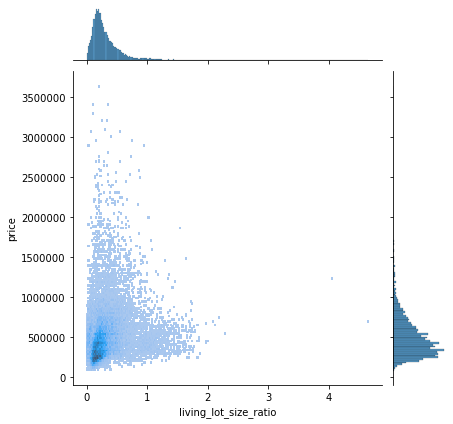

In [46]:
plt.figure(figsize=(13,8))
sns.jointplot(x=df['living_lot_size_ratio'], y=df['price'], data=df, kind='hist')

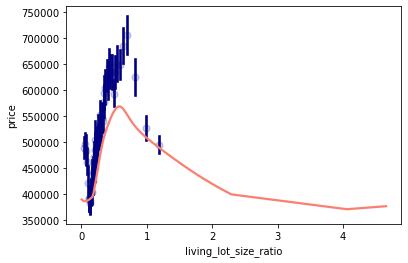

In [47]:
sns.regplot(x=df['living_lot_size_ratio'], y=df['price'],x_bins=50,\
            data=df, lowess=True, line_kws = {'color':'salmon'}, scatter_kws={'color':'navy', 'alpha':0.2})

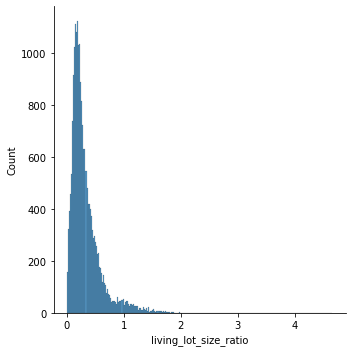

In [20]:
sns.displot(df['living_lot_size_ratio'])

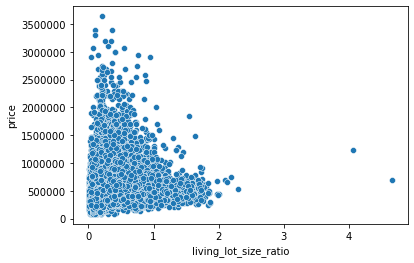

In [15]:
sns.scatterplot(x=df['living_lot_size_ratio'], y=df['price'], data=df)

0.44171459820140313   experiment with price
0.6457611925668382  grade
correlation with each other:  0.40950828972030606


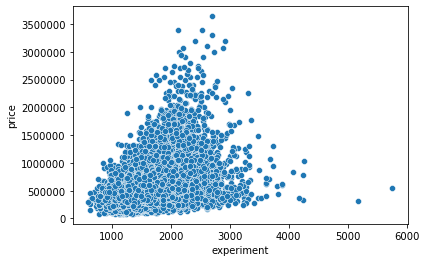

In [197]:
df['small_num_sum'] = df['waterfront']+df['was_renovated']+df['has_basement']+df['condition']
df['experiment'] = (df['sqft_living']/df['bathrooms']) + (df['sqft_living']/df['bedrooms'])
thing = df['experiment']#.map(lambda x: np.log(x))
sns.scatterplot(x=thing, y=df['price'])
print(np.corrcoef(x=thing, y= df['price'])[0][1], "  experiment with price")
print(np.corrcoef(x=df['grade'], y= df['price'])[0][1], ' grade')
print('correlation with each other: ', np.corrcoef(x=thing, y=df['grade'])[0][1])

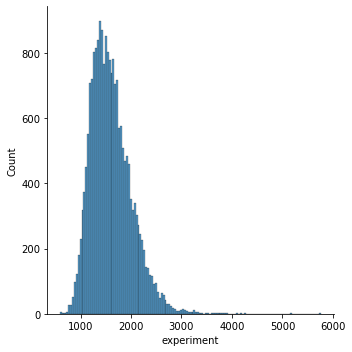

In [198]:
sns.displot(df['experiment'])

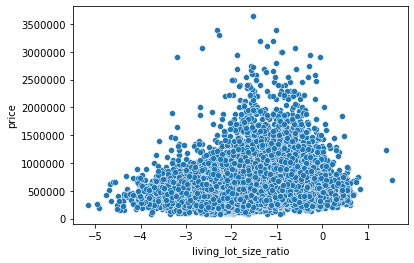

In [135]:
# Log transform the living lot ratio as well
sns.scatterplot(x = df['living_lot_size_ratio'].map(lambda x: np.log(x)), y= df['price'], data=df)
df['log_living_lot'] = df['living_lot_size_ratio'].map(lambda x: np.log(x))

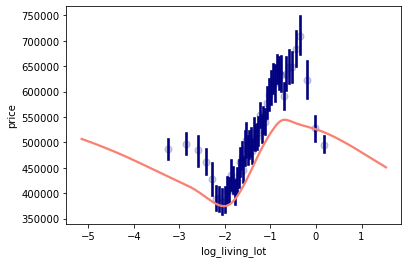

In [51]:
sns.regplot(x=df['log_living_lot'], y=df['price'],x_bins=50,\
            data=df, lowess=True, line_kws = {'color':'salmon'}, scatter_kws={'color':'navy', 'alpha':0.2})

In [23]:
np.corrcoef(x= df['log_living_lot'], y= df['price'])[0][1]

0.19123743875363983

In [24]:
df['living_lot_size_ratio'].describe()

count    20789.000000
mean         0.328376
std          0.268061
min          0.005820
25%          0.160832
50%          0.250000
75%          0.409357
max          4.653846
Name: living_lot_size_ratio, dtype: float64

In [168]:
subset_df = df[(df['living_lot_size_ratio'] <= 0.8)]
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19513 entries, 0 to 20787
Data columns (total 31 columns):
id                       19513 non-null int64
date                     19513 non-null object
price                    19513 non-null float64
bedrooms                 19513 non-null int64
bathrooms                19513 non-null float64
sqft_living              19513 non-null int64
sqft_lot                 19513 non-null int64
floors                   19513 non-null float64
waterfront               19513 non-null float64
view                     19513 non-null float64
condition                19513 non-null int64
grade                    19513 non-null int64
sqft_above               19513 non-null int64
sqft_basement            19513 non-null float64
yr_built                 19513 non-null int64
yr_renovated             19513 non-null float64
zipcode                  19513 non-null int64
lat                      19513 non-null float64
long                     19513 non-null float6

In [26]:
((len(df) - len(subset_df))/len(df))*100

6.137861368993217

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as sms
import scipy.stats as scs

In [28]:
import FlatironProjectFunctions as ffs

In [29]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'pop_density',
       'distance_frm_center', 'log_dist_frm_center', 'has_basement',
       'was_renovated', 'living_lot_size_ratio', 'experiment',
       'log_living_lot'],
      dtype='object')

In [207]:
vars_to_use = [ 'grade','small_num_sum','log_dist_frm_center', 'experiment', 'view']
    #'view'\
     #          ,'condition','grade'\
      #         ,'has_basement','was_renovated','log_living_lot', 'log_dist_frm_center']
target_var = 'price'
olsres = ffs.build_sm_ols(df=df, features_to_use=vars_to_use, target=target_var, add_constant=True)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     8436.
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:29:37   Log-Likelihood:            -2.8034e+05
No. Observations:               20789   AIC:                         5.607e+05
Df Residuals:                   20783   BIC:                         5.607e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.284e+06    

In [208]:
ffs.check_vif_feature_space(df=df, features_to_use=vars_to_use, add_constant=True, show_summary=False)

True

In [209]:
ypred = olsres.predict()

In [210]:
resid = df['price'] - ypred
df['resid'] = resid

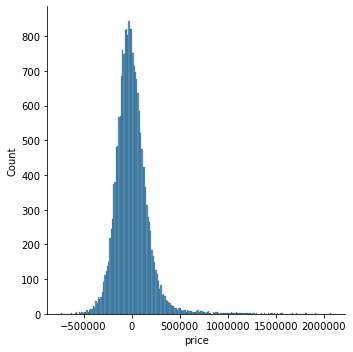

In [211]:
sns.displot(resid)

In [58]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'pop_density',
       'distance_frm_center', 'log_dist_frm_center', 'has_basement',
       'was_renovated', 'living_lot_size_ratio', 'experiment',
       'log_living_lot', 'resid'],
      dtype='object')

In [165]:
find_new_features = df[['log_dist_frm_center','pop_density','bedrooms','resid']]

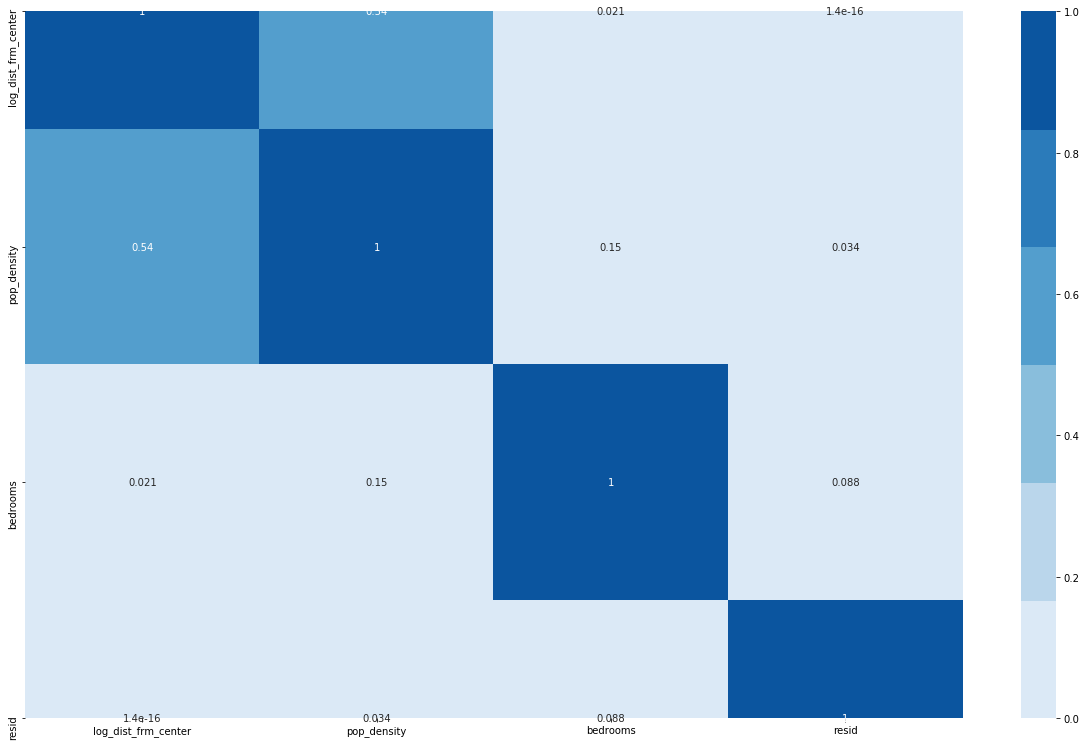

In [166]:
corr2 = np.abs(find_new_features.corr())
plt.figure(figsize=(21, 13))
sns.heatmap(data=corr2, annot=True, cmap=sns.color_palette('Blues'), fmt = '0.2g')

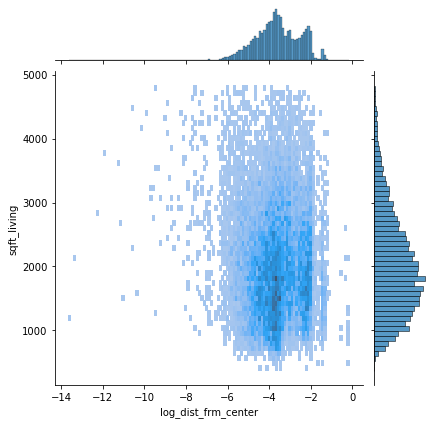

In [50]:
sns.jointplot(x='log_dist_frm_center', y='sqft_living', data=subset_df, kind='hist')

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
variance_inflation_factor(exog=df[vars_to_use].to_numpy(), exog_idx=1)

4.995145798952778

In [44]:
df[vars_to_use]

,log_dist_frm_center,sqft_living
0,-4.187183,1180
1,-4.234757,2570
2,-4.504654,770
3,-3.300726,1960
4,-3.292605,1680
...,...,...
20784,-4.117856,1530
20785,-3.489499,2310
20786,-5.238376,1020
20787,-3.272184,1600


In [213]:
ffs.check_model(df=subset_df, features_to_use=vars_to_use, target_col=target_var,  add_constant=True,   show_summary=True, vif_threshold=3.0)

grade surpassed threshold with vif=22.306250148310827
small_num_sum surpassed threshold with vif=16.295909676047522
log_dist_frm_center surpassed threshold with vif=11.860860116007887
experiment surpassed threshold with vif=14.548534539042057
Model contains multicollinear features
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     7909.
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:32:37   Log-Likelihood:            -2.6328e+05
No. Observations:               19513   AIC:                         5.266e+05
Df Residuals:                   19507   BIC:                         5.266e+05
Df Model:                           5                                         
Covaria